In [1]:
import numpy as np
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from sklearn import linear_model, preprocessing
import time
import random

# 支持中文
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [2]:
wv = np.load('./model/wv.npy')
vocab = []
with open('./data/common_word_list.txt', encoding = 'utf-8') as f:
    for line in f.readlines():
        vocab.append(line.strip())
print(vocab[:10])
print(wv[:10])
print("-"*40)
print("词表大小：", len(vocab), "词向量矩阵大小：",wv.shape)

['一', '一一', '一丁点儿', '一下', '一专多能', '一世', '一丘之貉', '一丝不挂', '一丝不苟', '一个心眼儿']
[[ 0.12077881  0.01579624 -0.16018876 ...  0.14167114  0.043945
  -0.08207788]
 [-0.1587381   0.2181573  -0.20078327 ...  0.06095327  0.09027559
   0.13185246]
 [ 0.28895995  0.32369     0.00986398 ... -0.1749011  -0.10420036
  -0.08039057]
 ...
 [-0.07374783 -0.35918233  0.23576638 ...  0.06894048 -0.53702134
   0.2312663 ]
 [ 0.1194022  -0.01366967 -0.3884288  ...  0.20233642 -0.07473911
   0.16539133]
 [ 0.23417552 -0.0485241  -0.0285177  ...  0.03321343 -0.00941553
  -0.13841018]]
----------------------------------------
词表大小： 54639 词向量矩阵大小： (54639, 256)


In [3]:
plants = []
with open('./class/uni_plants.txt', encoding='utf-8') as f:
    for word in f.readlines():
        word = word.strip()
        plants.append(word)

In [5]:
print(plants[:20], len(plants))

['甘草', '雏菊', '莼菜', '紫藤', '山核桃', '漆树', '苹果', '君子兰', '垂柳', '卷心菜', '何首乌', '黄曲霉', '油茶', '青豆', '银杏', '辣椒', '姜', '马尾松', '蒲公英', '哈密瓜'] 235


In [7]:
label = np.zeros(len(vocab))
cnt = 0
for word in plants:
    if word not in vocab:
        print(word)
        cnt+=1
    else:
        i = vocab.index(word)
        label[i] = 1
cnt

0

In [8]:
label.shape

(54639,)

In [9]:
r_model = linear_model.LinearRegression()
r_model.fit(wv, label)
display(r_model.intercept_) 
display(r_model.coef_)

0.0077705565

array([ 6.02153176e-03,  1.85441098e-03,  1.14024617e-02,  7.41529185e-03,
        7.68964365e-03, -3.77958803e-03, -7.79558159e-03, -6.62443554e-03,
        2.88217748e-03,  6.08586147e-03, -3.60586634e-03,  3.45261209e-03,
       -2.69826083e-03,  1.71805825e-03,  2.28936505e-03,  6.43751398e-03,
        4.83827014e-03, -1.03246272e-02,  4.76579089e-03,  6.48612343e-03,
       -1.32063311e-03,  3.03089013e-03,  2.52113631e-03,  3.11363558e-03,
       -7.52405496e-03,  9.08393878e-03, -1.70112494e-03, -6.59846561e-03,
       -3.05018947e-03, -3.46559077e-03,  1.38955633e-03, -9.24566854e-03,
       -1.82210049e-03,  4.66959924e-03,  1.04056671e-04, -2.56819231e-03,
       -3.46086244e-03, -2.95339618e-03, -2.68363813e-03, -4.40134667e-03,
        7.43530411e-03, -4.38548625e-03, -6.06269622e-03,  1.85460993e-03,
       -2.56040599e-04,  8.50960426e-03, -9.85944876e-04,  5.36704250e-03,
        5.06829098e-03, -1.54071464e-03,  2.37069931e-03,  4.14442504e-03,
       -1.08251430e-03,  

In [10]:
weights = r_model.coef_
bias = r_model.intercept_

Picture has been saved as ./pics/plants_weight_210406_2051.png.


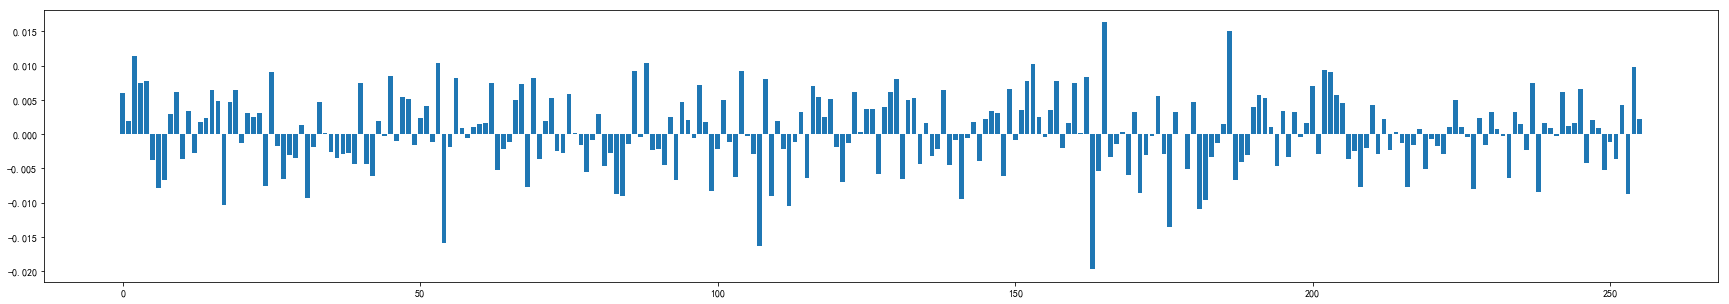

In [11]:
# weights in each dimensions
file_name = f'./pics/plants_weight_{time.strftime("%y%m%d_%H%M", time.localtime())}.png'
x = np.arange(0, 256, 1)
plt.figure(figsize=(30, 5))
plt.bar(x, r_model.coef_)
plt.savefig(file_name)
print(f'Picture has been saved as {file_name}.')
plt.show()

In [13]:
# 词向量*权重热力图
plants_wv = []
for word in plants:
    plants_wv.append(wv[vocab.index(word)])
plants_wv = np.array(plants_wv)
plants_wv.shape

(235, 256)

In [14]:
pre_mat = plants_wv*weights
pre_avg = np.mean(pre_mat, axis=0)
pre_avg.shape

(256,)

Picture has been saved as ./pics/plants_heatmap_words_210406_2053.png.


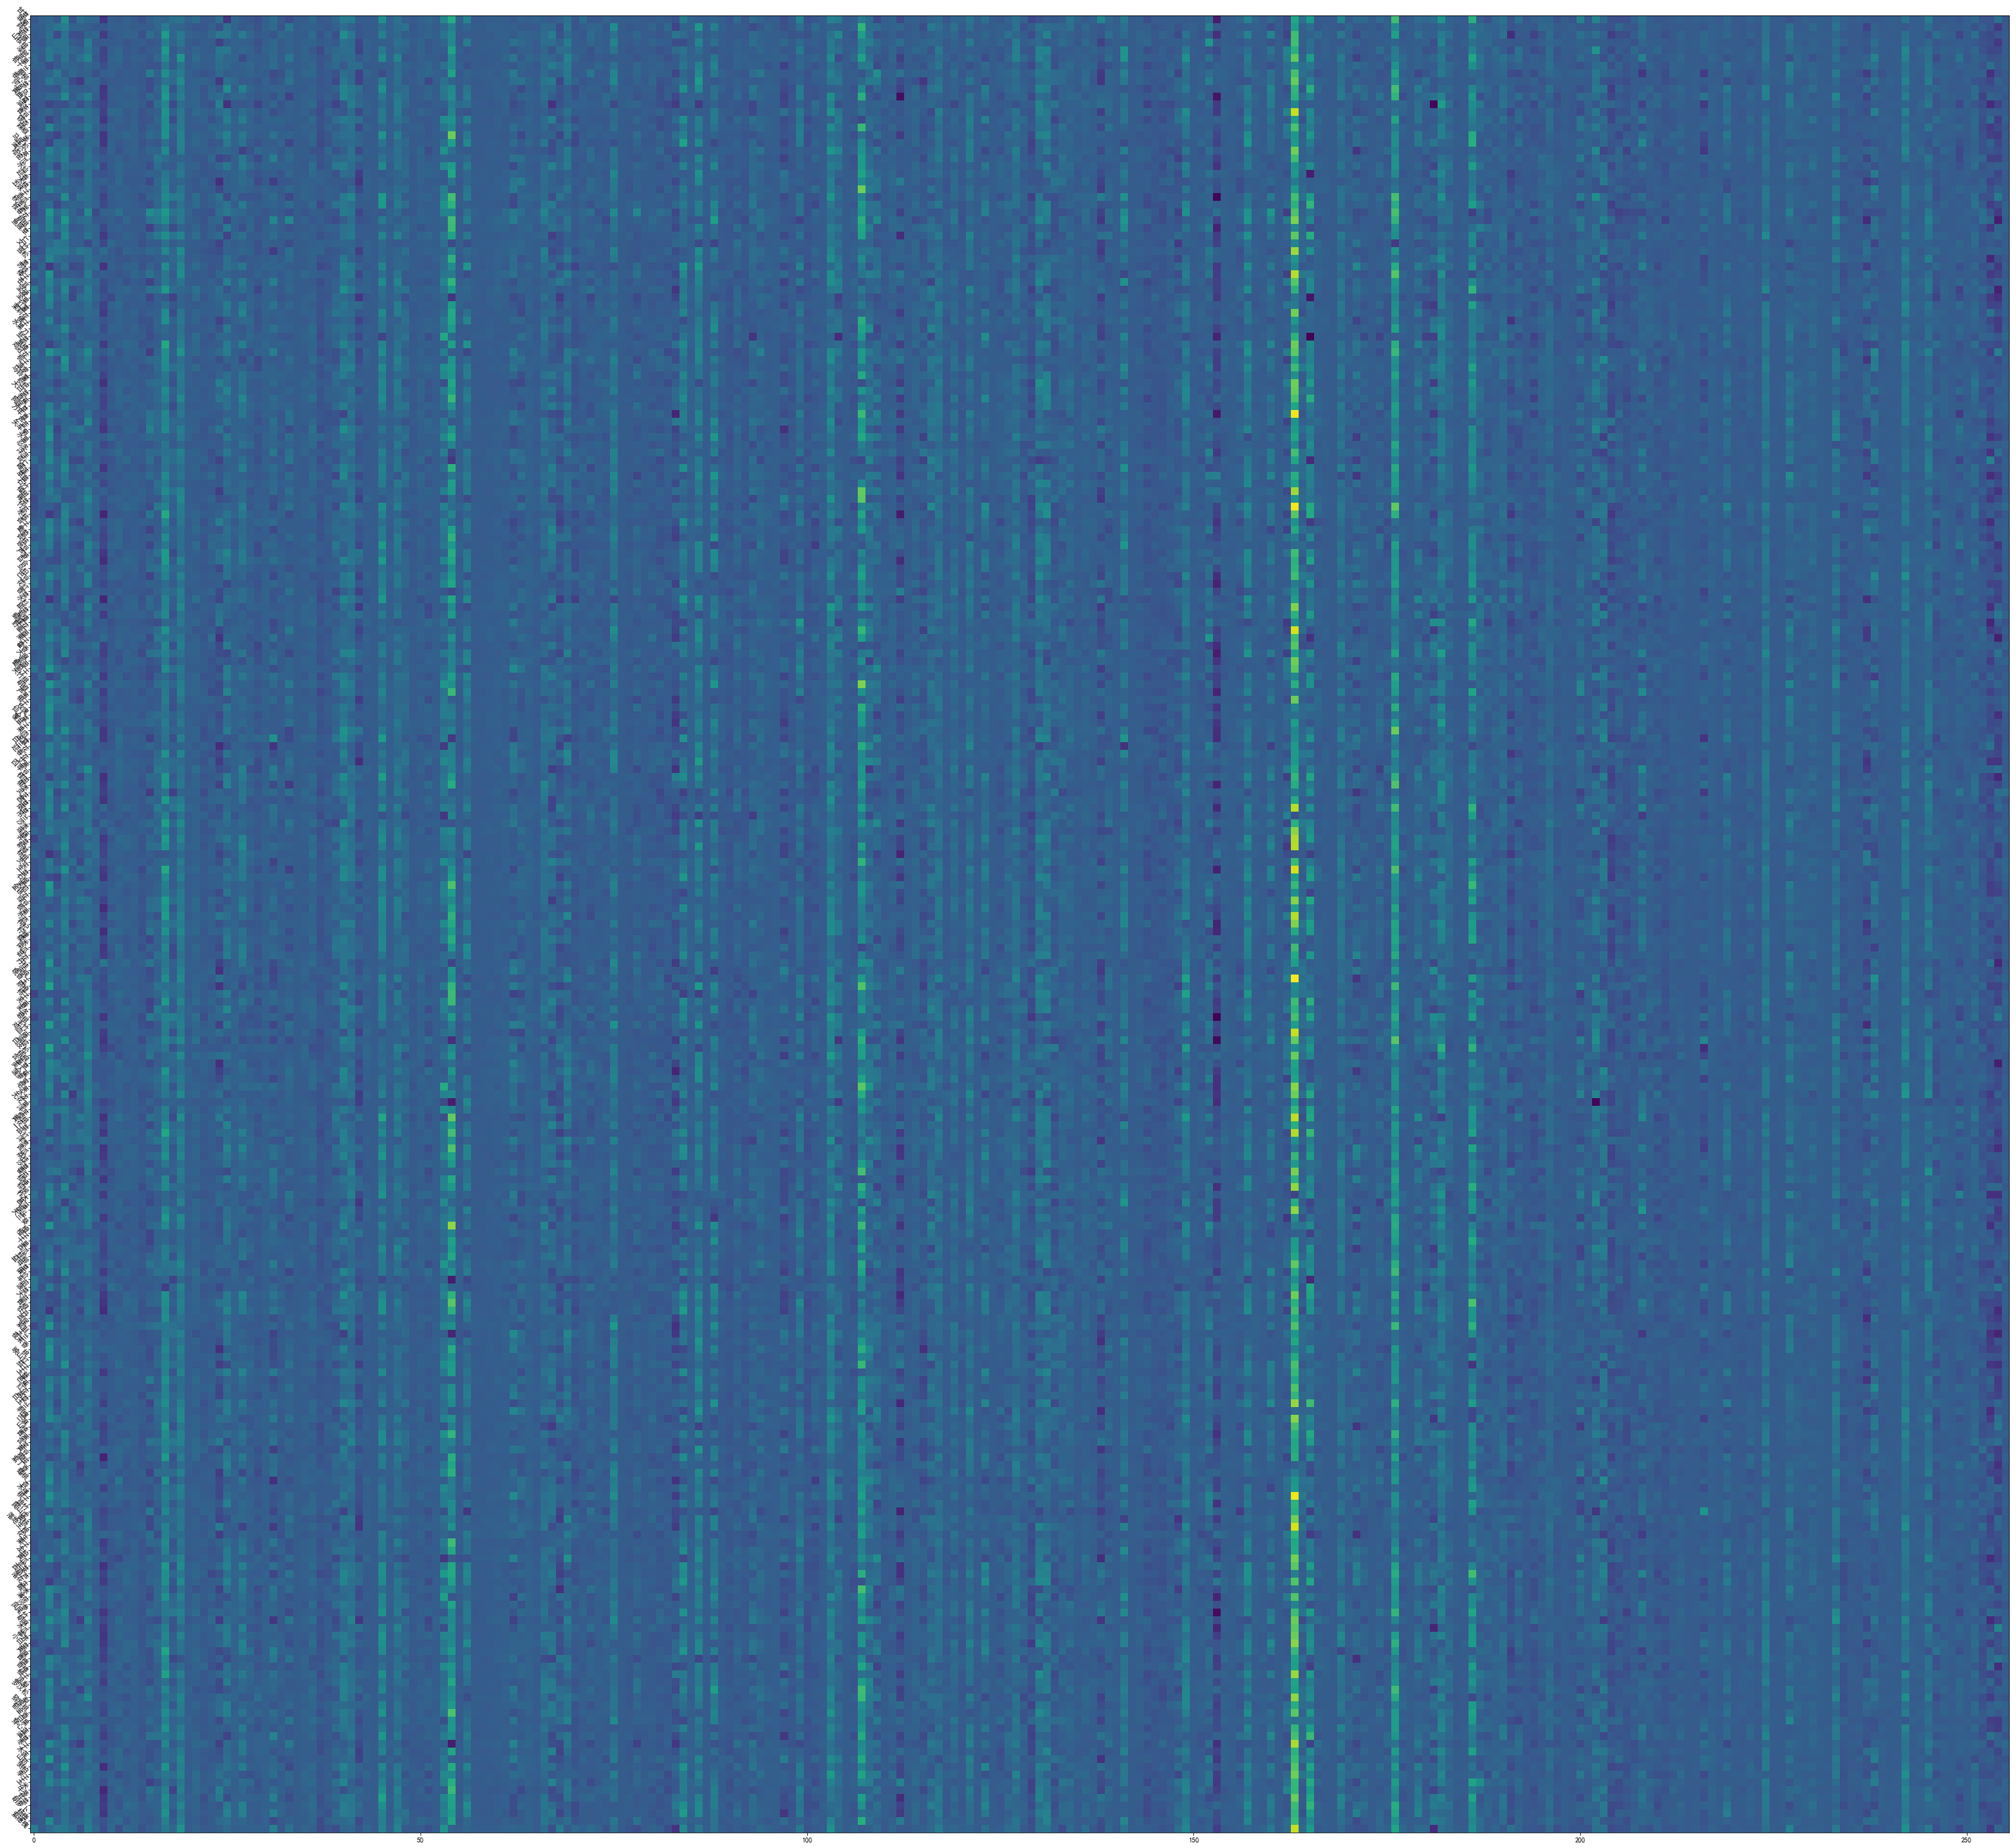

In [15]:
# Heatmap
file_name = f'./pics/plants_heatmap_words_{time.strftime("%y%m%d_%H%M", time.localtime())}.png'
fig, ax = plt.subplots(figsize=(40, 40))
im = ax.imshow(pre_mat)
ax.set_yticks(np.arange(len(plants)))
ax.set_yticklabels(plants)
plt.setp(ax.get_yticklabels(), rotation=-45, ha="right", rotation_mode="anchor")
fig.tight_layout()
# plt.savefig(file_name, dpi=100)
print(f'Picture has been saved as {file_name}.')
plt.show()

In [16]:
print(np.argsort(-pre_avg))
print(pre_avg[np.argsort(-pre_avg)[:10]])

[163 176  54 107 186  17 103 165  45  19 182  86 242 157 149   4  53   2
 224  75  40 130  84  88 141 131  47 233 169  41   7 245 127 121 117  56
 108  99  69  66  25  27 227 160 202 196 123 203 116 179 119 104 190 219
 187 152 183 109 238  67 164 208 134  16  48  94 133 251  36  93  62 230
 136 200 126  31  26 114  21  64 162 217 111  39 228 181  33 189  85 139
   8  30  18  91  11 222  63 174 171 192  78 154 244  28 247  13 166 213
 128 243 170  72 158  61  46   3  35  50 209 229   6  96  60 137 188  12
  73  20 231 201 172  95 180  43  71 143   5 250 195 151  52 155 102 240
 212 113  59 159 150 198 255 148 167  80 177 140 249 241  76  87  23  89
 215  74  34 218   1 156 248 122  15  55  32 178 232 226 142 185  10 161
  44 135 124 105 173 239   0 132  58 110  65 207 168 118 220  79  51  57
 125 225 214 147 184 235 197  24 101 175  82 216 221 199  38 246 120 223
 210 205  81  68 106 236  22  77  49 115 193  98  97  29  92 234 237  70
  14 194 145  90 252 144  83 146 211 138  42 206 10

In [17]:
plants_sample = random.sample(plants, 10)
plants_sample_wv = []
for i in plants_sample:
    t = [wv[vocab.index(i)][163], wv[vocab.index(i)][176], wv[vocab.index(i)][54]]
    plants_sample_wv.append(t)
plants_sample_wv = np.array(plants_sample_wv)
print(plants_sample, plants_sample_wv)

['猕猴桃', '晚香玉', '菠萝', '莴苣', '黄豆', '糯米', '迎春花', '荔枝', '梧桐', '斑竹'] [[-0.6745841  -0.56144    -0.77930814]
 [-0.2821158  -0.84236854 -0.67630774]
 [-0.2984711  -0.6247192  -0.43041533]
 [-0.81118494 -0.7596318  -0.33003128]
 [-0.5027153  -0.6454706  -0.61670643]
 [-0.5838255  -0.5521576  -0.4308397 ]
 [-0.3627232  -0.27521908 -0.28389478]
 [-0.3718373  -0.31277922 -0.4467473 ]
 [-0.43115517 -0.17149054 -0.1172694 ]
 [-0.5022013  -0.24511138 -0.34601864]]


In [18]:
common_sample = random.sample(vocab, 10)
common_sample_wv = []
for i in common_sample:
    t = [wv[vocab.index(i)][163], wv[vocab.index(i)][176], wv[vocab.index(i)][54]]
    common_sample_wv.append(t)
common_sample_wv = np.array(common_sample_wv)
print(common_sample, common_sample_wv)

['垄沟', '而已', '外痔', '保卫', '容貌', '眼晕', '潜水艇', '企业主', '私有', '莲子'] [[ 0.09186142 -0.1383954   0.0226392 ]
 [-0.17884189  0.16773091 -0.04390633]
 [ 0.2397948   0.16966659 -0.27785736]
 [ 0.45910656  0.29567647 -0.24835864]
 [ 0.14477916 -0.4081746  -0.04442983]
 [ 0.15716308  0.08760779 -0.2775658 ]
 [ 0.27963826 -0.411833   -0.39137393]
 [-0.12536807 -0.02662253 -0.23591271]
 [ 0.16196945 -0.3516602   0.04398474]
 [ 0.08997085 -0.10934714 -0.5384054 ]]


Picture has been saved as ./pics/plants_viusal_2d_210406_2103.png.


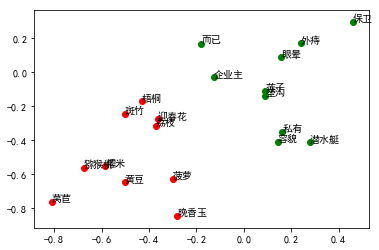

In [20]:
# 2-d visualization
file_name = f'./pics/plants_viusal_2d_{time.strftime("%y%m%d_%H%M", time.localtime())}.png'
plt.scatter(plants_sample_wv[:,0], plants_sample_wv[:,1], c='r')
plt.scatter(common_sample_wv[:,0], common_sample_wv[:,1], c='g')
for i in range(len(plants_sample_wv)):
    plt.text(plants_sample_wv[i,0], plants_sample_wv[i,1], plants_sample[i])
    plt.text(common_sample_wv[i,0], common_sample_wv[i,1], common_sample[i])
plt.savefig(file_name, dpi=100)
print(f'Picture has been saved as {file_name}.')
plt.show()

Picture has been saved as ./pics/plants_viusal_3d_210406_2209.png.


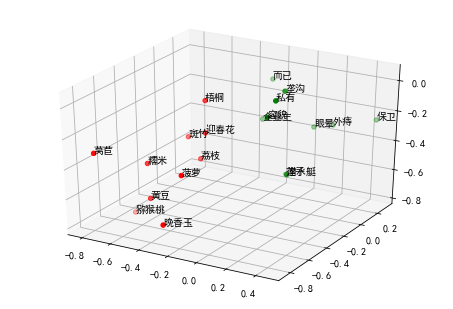

In [26]:
from mpl_toolkits.mplot3d import Axes3D

file_name = f'./pics/plants_viusal_3d_{time.strftime("%y%m%d_%H%M", time.localtime())}.png'
fig = plt.figure()
ax = Axes3D(fig)
for i in range(10):
    ax.text(plants_sample_wv[i,0], plants_sample_wv[i,1], plants_sample_wv[i,2], plants_sample[i])
    ax.text(common_sample_wv[i,0], common_sample_wv[i,1], common_sample_wv[i,2], common_sample[i])
ax.scatter(plants_sample_wv[:,0], plants_sample_wv[:,1], plants_sample_wv[:,2], c='r')
ax.scatter(common_sample_wv[:,0], common_sample_wv[:,1], common_sample_wv[:,2], c='g')
plt.savefig(file_name, dpi=100)
print(f'Picture has been saved as {file_name}.')
plt.show()

In [21]:
import pickle

In [25]:
with open('./model/plant_model.pkl', 'wb') as f:
    pickle.dump(r_model, f)